Kaggle House Prices Data Exploration

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Import the data

In [3]:
train = pd.read_csv("./data/train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Exploring the target

In [4]:
print(train['SalePrice'].describe())
print("\nThe median of the Housing Price is: ", train['SalePrice'].median(axis = 0))

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The median of the Housing Price is:  163000.0


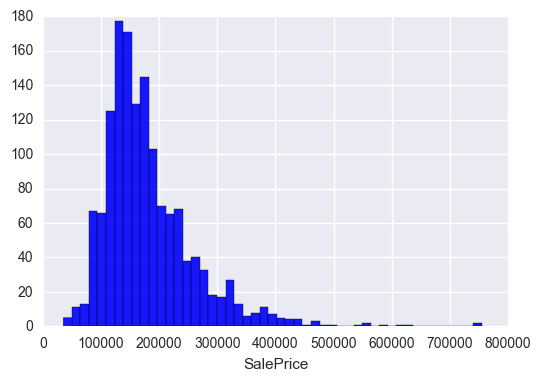

In [4]:
sns.distplot(train['SalePrice'], kde = False, color = 'b', hist_kws={'alpha': 0.9})

Exploring the correlations to sales price

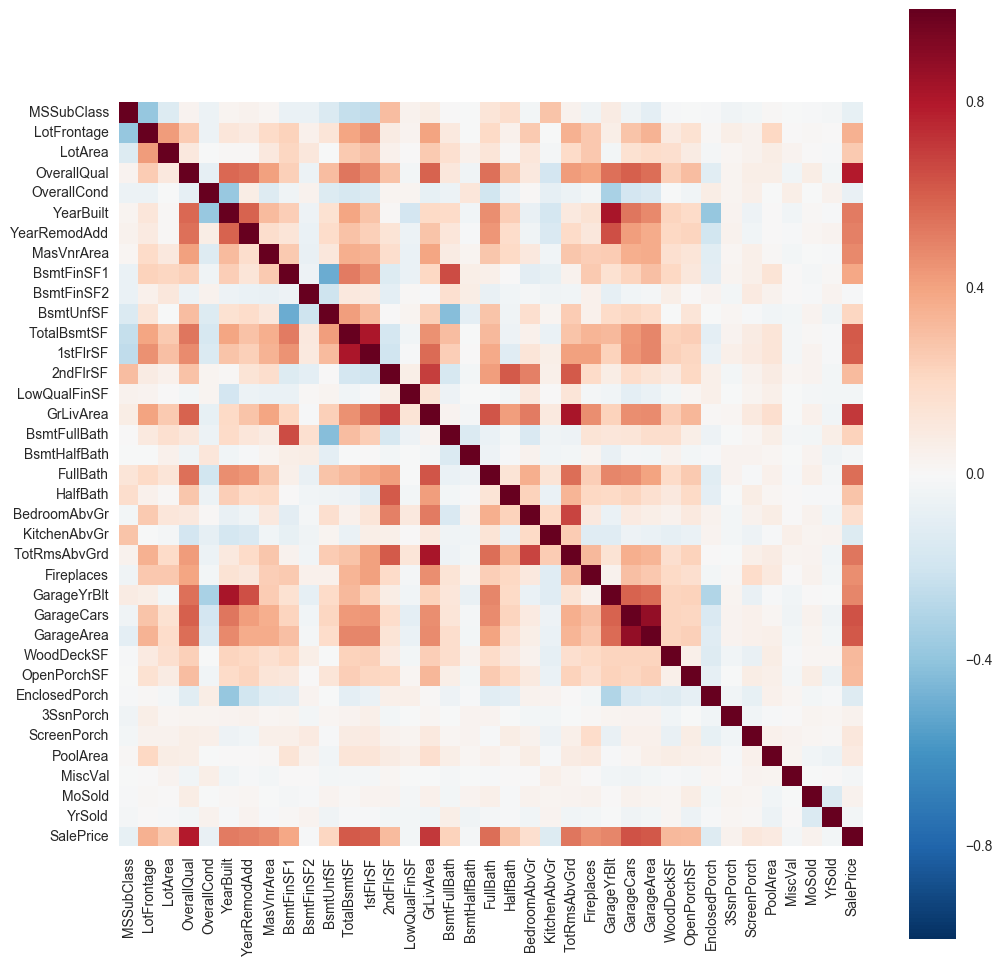

In [5]:
corr = train.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)

and in table form

In [6]:
cor_dict = corr['SalePrice'].to_dict()
del cor_dict['SalePrice']
print("The numerical features decendingly by their correlation with Sale Price:\n")
for item in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*item))

The numerical features decendingly by their correlation with Sale Price:

OverallQual: 	0.7909816005838047
GrLivArea: 	0.7086244776126511
GarageCars: 	0.640409197258349
GarageArea: 	0.6234314389183598
TotalBsmtSF: 	0.6135805515591944
1stFlrSF: 	0.6058521846919166
FullBath: 	0.5606637627484452
TotRmsAbvGrd: 	0.5337231555820238
YearBuilt: 	0.5228973328794967
YearRemodAdd: 	0.5071009671113867
GarageYrBlt: 	0.48636167748786213
MasVnrArea: 	0.4774930470957107
Fireplaces: 	0.4669288367515242
BsmtFinSF1: 	0.38641980624215627
LotFrontage: 	0.35179909657067854
WoodDeckSF: 	0.32441344456813076
2ndFlrSF: 	0.31933380283206614
OpenPorchSF: 	0.31585622711605577
HalfBath: 	0.2841076755947784
LotArea: 	0.2638433538714063
BsmtFullBath: 	0.22712223313149718
BsmtUnfSF: 	0.214479105546969
BedroomAbvGr: 	0.1682131543007415
KitchenAbvGr: 	-0.1359073708421417
EnclosedPorch: 	-0.12857795792595636
ScreenPorch: 	0.11144657114291048
PoolArea: 	0.09240354949187278
MSSubClass: 	-0.08428413512659523
OverallCond: 	-

Exploring the correlation in graphical form

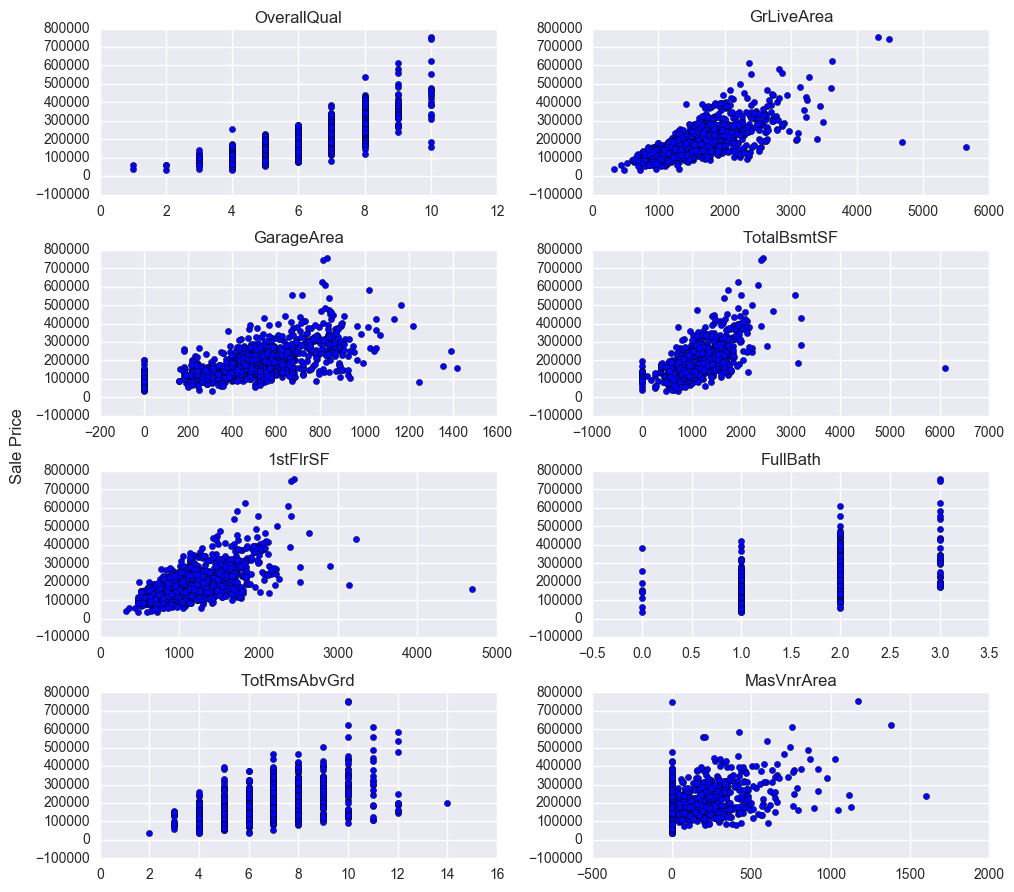

In [9]:
plt.figure(1)
figure, axarr = plt.subplots(4, 2, figsize=(10, 9))
price = train.SalePrice.values
axarr[0, 0].scatter(train.OverallQual.values, price)
axarr[0, 0].set_title('OverallQual')

axarr[0, 1].scatter(train.GrLivArea.values, price)
axarr[0, 1].set_title('GrLiveArea')

axarr[1, 0].scatter(train.GarageArea.values, price)
axarr[1, 0].set_title('GarageArea')

axarr[1, 1].scatter(train.TotalBsmtSF.values, price)
axarr[1, 1].set_title('TotalBsmtSF')

axarr[2, 0].scatter(train['1stFlrSF'].values, price)
axarr[2, 0].set_title('1stFlrSF')

axarr[2, 1].scatter(train.FullBath.values, price)
axarr[2, 1].set_title('FullBath')

axarr[3, 0].scatter(train.TotRmsAbvGrd.values, price)
axarr[3, 0].set_title('TotRmsAbvGrd')

axarr[3, 1].scatter(train.MasVnrArea.values, price)
axarr[3, 1].set_title('MasVnrArea')

figure.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()